In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

import torch

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

    
print(device)

cuda:0


In [6]:
class span:
    def __init__(self, pts, max_charge = 3):
        self.max_charge = max_charge
        self.curr_charge = self.max_charge
        self.min_charge = 0.75
        self.pts = pts
        self.home = pts[0]
        self.center_dis = {}
        self.indices_for_order = {}
        self.path = []
        self.curr_path = []
        self.visited_map = {}
        self.order = []
        self.center_dis = {}
        self.grid = {}
        
        
    def distance(self, pt1, pt2):
        return np.sqrt((pt1[0]-pt2[0])**2 + (pt1[1]-pt2[1])**2)
    
    def cal_visited_map(self):
        for i in range(0,len(self.pts)):
            key = str(self.pts[i])
            self.visited_map[key] = 0
        return self.visited_map

    def cal_indices(self):
        for i in range(1,len(self.pts)):
            key = str(self.pts[i])
            self.indices_for_order[key] = i
        return self.indices_for_order
        
    def cal_center_distance_map(self):
        for i in range(1,len(self.pts)):
            key = str(self.pts[i])
            self.center_dis[key] = self.distance(self.home, self.pts[i])
        return self.center_dis
            
    def cal_curr_distance_map(self,curr_point):
        self.curr_point_map = {}
        for i in range(1,len(self.pts)):
            if self.pts[i][0] == curr_point[0] and self.pts[i][1] == curr_point[1]:
                pass
            else:
                key = str(self.pts[i])
                self.curr_point_map[key] = self.distance(curr_point, self.pts[i])
        return self.curr_point_map

    def sort_dict(self, tar_dict):
        self.sorted_distance = {}
        sorted_keys = sorted(tar_dict, key=tar_dict.get)  # [1, 3, 2]
        for w in sorted_keys:
            self.sorted_distance[w] = tar_dict[w]
        return self.sorted_distance
    
    def make_grid(self):
        center_dis = self.cal_center_distance_map()
        sorted_center_dict = self.sort_dict(center_dis)
        old_keys = np.array(list(sorted_center_dict))
        key_list = self.get_sort_list(old_keys)
        for key in key_list:
            key_dis = self.cal_curr_distance_map(key)
            sorted_key_dis = self.sort_dict(key_dis)
            self.grid[str(key)] = sorted_key_dis
        return sorted_center_dict, self.grid, key_list

        
    def get_sort_list(self, key_list):
        data = []
        for i in range(0,len(key_list)):
            a = key_list[i].split()
            a_new = []
            for j in range(0, len(a)):
                element = a[j]
                new_elem = []
                for el in element:
                    if el == '[' or el == ']':
                        pass
                    else:
                        new_elem.append(el)
                new_elem = ''.join(new_elem)
                if len(new_elem) > 0:
                    f_new = float(new_elem)
                    a_new.append(f_new)
            cur = np.asarray(a_new)
            data.append(cur)
        data_set = np.array(data)
        return data_set    
    
    def generate_path(self):
        indices = self.cal_indices()
        prev_pt = self.home
        visited_map = self.cal_visited_map()
        center_dis, grid, key_list = self.make_grid()

        final_order = []
        final_order.append(0)
        curr_point = key_list[0]

        for elem in range(0, len(self.pts)-1):
            curr_dict = grid[str(curr_point)]
            old_keys_sub = np.array(list(curr_dict))
            key_list_sub = self.get_sort_list(old_keys_sub)
            if not visited_map[str(curr_point)]:
                if prev_pt[0] == self.home[0] and prev_pt[1] == self.home[1]:
                    curr_dis = center_dis[str(curr_point)]
                    self.curr_charge -= curr_dis
                    visited_map[str(curr_point)] = 1
                    self.curr_path.append(list(curr_point))
                    final_order.append(indices[str(curr_point)])
                    prev_pt = curr_point
                    count = 0
                    for k in key_list_sub:
                        if not visited_map[str(k)] and count == 0:
                            curr_point = k
                            count += 1
                        else:
                            pass
                        
                elif self.max_charge >= (self.curr_charge - self.distance(prev_pt, curr_point)) >= self.min_charge: 
                    curr_dis = self.distance(prev_pt, curr_point)
                    self.curr_charge -= curr_dis
                    visited_map[str(curr_point)] = 1
                    self.curr_path.append(list(curr_point))
                    final_order.append(indices[str(curr_point)])
                    prev_pt = curr_point
                    count = 0
                    for k in key_list_sub:
                        if not visited_map[str(k)] and count == 0:
                            curr_point = k
                            count += 1
                        else:
                            pass
                        
                else:
                    final_order.append(0)
                    self.curr_charge = 3
                    visited_map[str(self.home)] += 1
                    self.curr_path.insert(0, list(self.home))
                    self.curr_path.append(list(self.home))
                    self.path.append(self.curr_path)
                    self.curr_path = []
                    prev_pt = self.home
                    count = 0
                    for k in key_list_sub:
                        if not visited_map[str(k)] and count == 0:
                            curr_point = k
                            count += 1
                        else:
                            pass
        final_order.append(0)
        return self.path, final_order

In [7]:
home = np.array([0.5, 0.5])
pts_in = np.random.rand(500,2)
pts_input = np.around(pts_in, 4)


max_charge = 3.0
pts = np.vstack((home, pts_input))

In [8]:
Span_1 = span(pts)

path_B, order = Span_1.generate_path()

<Figure size 432x288 with 0 Axes>

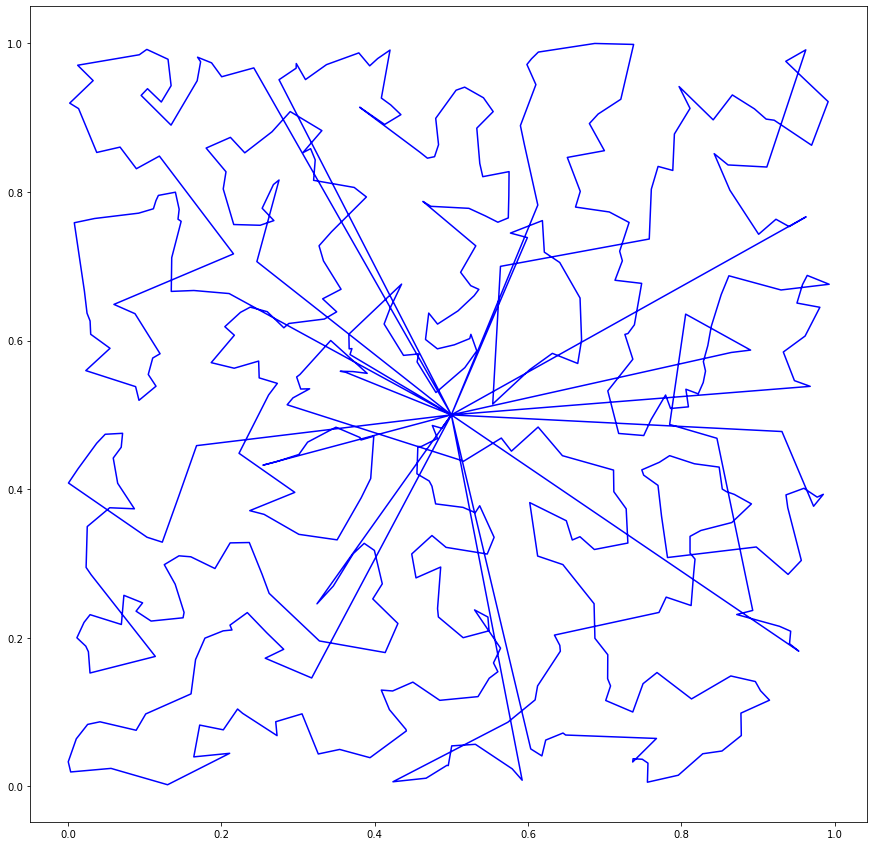

In [9]:
fig = plt.figure(2)
plt.figure(figsize=(15, 15))

x_value = []
y_value = []
for p in order:

    x1, y1 = pts[p][0], pts[p][1]
    x_value.append(y1)
    y_value.append(x1)
plt.plot(x_value, y_value, c = 'blue')
plt.savefig("plan_C.png")
plt.show()